# OSEMN Framework

## Obtain

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/framingham.csv')

## Scrub

- describe() to see which column has null value
- convert all data to numerical

In [2]:
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [3]:
# some missing data in glucose, BMI, and few other columns. hence clean by drop them
df = df.dropna()

df.sample(5)

# all features are already in numerical, hence jump to EDA

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3454,1,47,4.0,0,0.0,0.0,0,1,0,254.0,138.0,96.0,29.73,63.0,69.0,0
1914,1,62,3.0,1,20.0,0.0,0,0,0,300.0,108.0,73.0,20.87,60.0,80.0,0
1419,1,42,3.0,1,20.0,0.0,0,0,0,231.0,123.0,87.0,21.48,75.0,44.0,0
410,1,36,3.0,0,0.0,0.0,0,0,0,174.0,131.0,86.0,26.23,75.0,64.0,0
3612,0,49,2.0,0,0.0,0.0,0,0,0,308.0,128.0,78.0,24.82,80.0,70.0,0


## Explore

- Heatmap : to remove any features that's corr > 0.7
- Boxplot : will do with & without outlier if outlier data > 5% of all data


<AxesSubplot:>

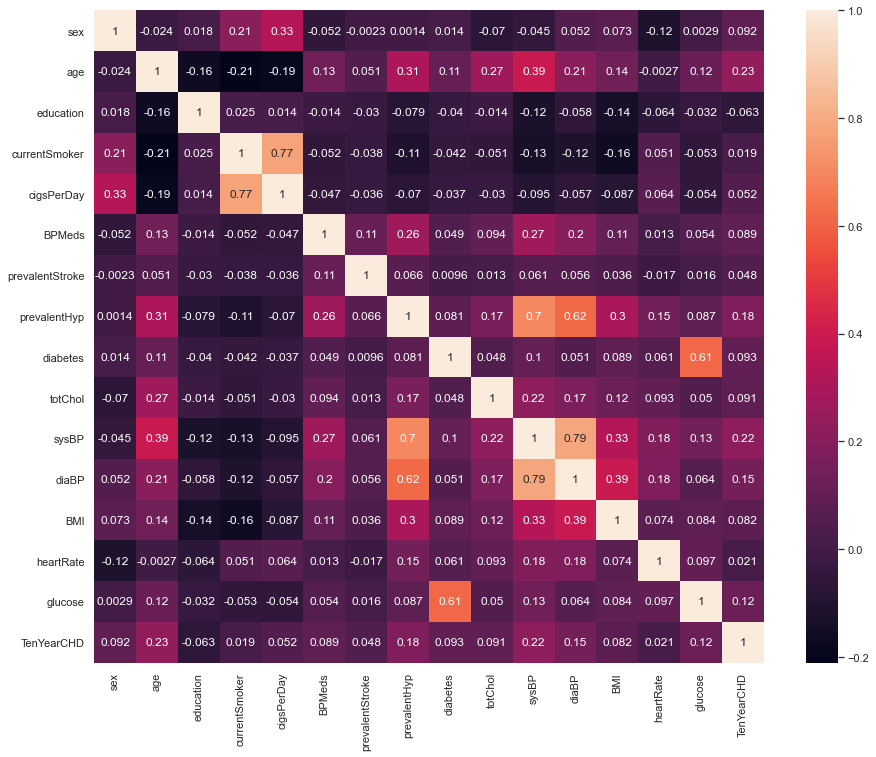

In [4]:
# heatmap 

corr_matrix = df.corr()

sns.set(font_scale = 1)
sns.set(rc={'figure.figsize' : (15,12)})
sns.heatmap(corr_matrix, annot = True)


# remove corr > 0.7 features ['cigsPerDay', 'sysBP']

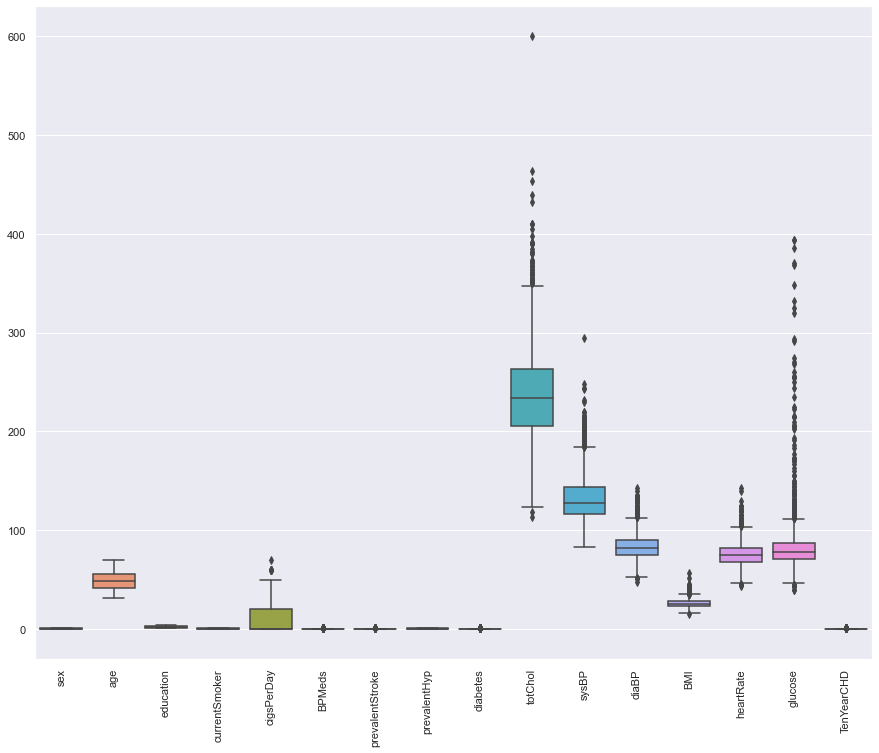

In [5]:
# boxplot

sns.set(rc={'figure.figsize' : (15,12)})
bxp = sns.boxplot(data = df)
bxp.set_xticklabels(bxp.get_xticklabels(), rotation = 90);

# since theres several features that has lots of outliers, we might consider building another model with & without outlier

## Model

- Using Decision tree
- 3 models :
    - All features
    - removed outliers (where outliers is > 2 stdev)
    - removed outliers + removed high corr features ['cigsPerDay', 'sysBP']
- Model with highest accuracy test score wins (with train-test split 0.8)

In [6]:
df.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Model_1 : All features

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [8]:
# assign features
X = df.drop(['TenYearCHD'], axis = 1)

# assign target variable
y = df['TenYearCHD']

In [9]:
# train & test dataset split, using package, method1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)


In [10]:
# call the model you want to use, this case is decisionTree

from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)

In [11]:
# run the model with test dataset
y_pred = model.predict(X_test)

# get the model accuracy on test dataset
acc_score = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on TEST data is {(acc_score * 100):.2f}")

Model Accuracy on TEST data is 84.61


In [14]:
def decision_tree_model_accuracy(X, y, df):
    """input features & target variable, return model accuracy"""

    # train & test dataset split manual way, method2
    train_len = int(len(df) * 0.7)

    X_train = X[:train_len]
    X_test = X[train_len:]

    y_train = y[:train_len]
    y_test = y[train_len:]


    # call the model you want to use, this case is decisionTree
    model = tree.DecisionTreeClassifier(max_depth=3)
    model = model.fit(X_train, y_train)

    # run the model with test dataset
    y_pred = model.predict(X_test)

    # get the model accuracy on test dataset
    acc_score = accuracy_score(y_test, y_pred)

    return f"Model Accuracy on TEST data is {(acc_score * 100):.2f}"



In [15]:
decision_tree_model_accuracy(X, y, df)

'Model Accuracy on TEST data is 84.61'

### Model_2 : Removed Outliers

In [16]:
# remove outlier from dataset
from scipy import stats

z_score = stats.zscore(df)
abs_z_score = np.abs(z_score)
filter_out_outliers = (abs_z_score < 2).all(axis = 1)

df_m2 = df[filter_out_outliers]

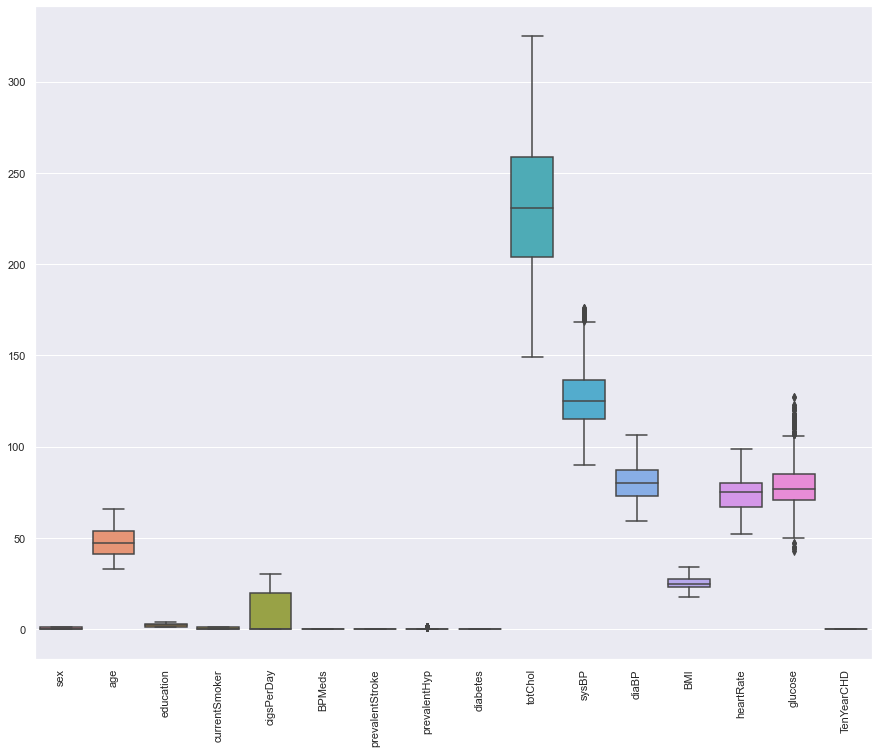

In [17]:
# quick boxplot check that outliers is removed

bxp = sns.boxplot(data = df_m2)
bxp.set_xticklabels(bxp.get_xticklabels(), rotation = 90);

In [18]:
# check if theres any null & how much data left once we removed the outlier

df_m2.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.0,2395.0,2395.000000,2395.0,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.0
mean,0.422129,48.030063,2.046347,0.474322,7.709395,0.0,0.0,0.209603,0.0,231.627140,126.600626,80.523173,25.170205,74.190397,78.862213,0.0
std,0.494002,8.061321,1.028389,0.499444,9.903750,0.0,0.0,0.407111,0.0,37.863626,16.045873,9.613325,3.245541,9.821319,12.000323,0.0
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,149.000000,90.000000,59.000000,17.810000,52.000000,43.000000,0.0
25%,0.000000,41.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,204.000000,115.000000,73.000000,22.890000,67.000000,71.000000,0.0
50%,0.000000,47.000000,2.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,231.000000,125.000000,80.000000,24.960000,75.000000,77.000000,0.0
75%,1.000000,54.000000,3.000000,1.000000,20.000000,0.0,0.0,0.000000,0.0,259.000000,136.500000,87.000000,27.350000,80.000000,85.000000,0.0
max,1.000000,66.000000,4.000000,1.000000,30.000000,0.0,0.0,1.000000,0.0,325.000000,176.000000,106.500000,33.900000,99.000000,127.000000,0.0


In [19]:
# assign features
X = df_m2.drop(['TenYearCHD'], axis = 1)

# assign target variable
y = df_m2['TenYearCHD']

In [20]:
# train & test model, and get accuracy score
decision_tree_model_accuracy(X, y, df_m2)


'Model Accuracy on TEST data is 100.00'

### Model_3 : Removed outliers + Removed high correlated features

In [21]:
# scrub data as per requirements
df_m3 = df_m2.drop(['cigsPerDay', 'sysBP'], axis = 1)


In [22]:
# assign features
X = df_m3.drop(['TenYearCHD'], axis = 1)

# assign target variable
y = df_m3['TenYearCHD']

In [23]:
# train & test model, and get accuracy score
decision_tree_model_accuracy(X, y, df_m3)

'Model Accuracy on TEST data is 100.00'

## iNterpret

- We take model3 to interpret
- show decision tree chart

In [24]:
import graphviz

columns = list(X_test.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled=True, rounded=True)

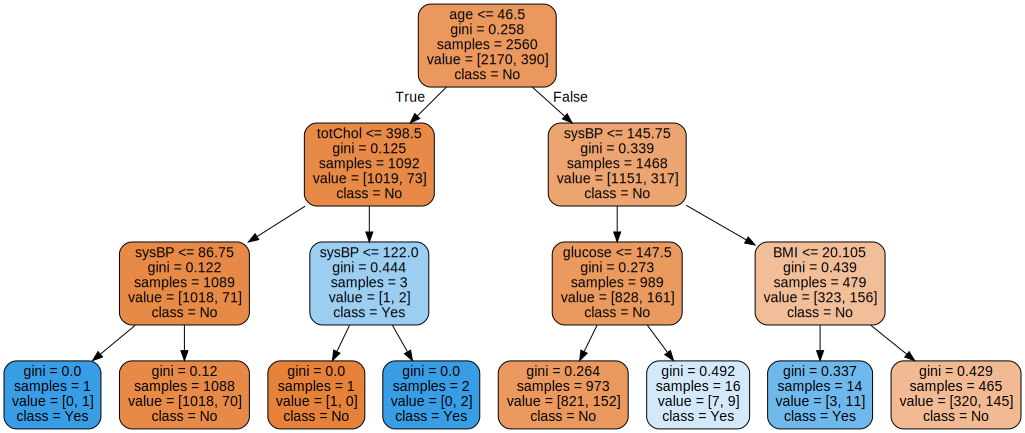

In [25]:
graph = graphviz.Source(dot_data)
graph

- gini ? : lower the gini, more confident the prediction. range 0 - 0.5
- darker the color, the better ? yes. darker the color, more confident & accurate the prediction is (lower gini)
- class yes & no meaning ? majority of the data. no : majority did NOT get heart issue (y = 0), and vise versa (y = 1) 

## How can we read the chart :

- First layer of filter is Age. If we group it between younger & older than 48.5 , we can say with a certain confident that out of 2926 people, 2486 people did not got CHD, and 440 does got CHD 
- Say we have a candidate age below 48.5, totChol below 398.5, and BMI greater than 22.05, we can say with full confident that this person has a CHD (??)

### Day 9

Answers : 
- First layer of filter is Age. If we group it between younger & older than 48.5 , we can say with a certain confident that out of 2926 people, 2486 people did not got CHD, and 440 does got CHD

- Say we have a candidate age below 48.5, totChol below 398.5, and BMI greater than 22.05, we can say with full confident that this person has a CHD, as per the chart shown (??)


questions :

- please do assist me in improve my answer on how to interpret the tree chart result better 

- when do we have to scale (standardscaler, minmax, etc) the data before we put it into the model ? (or, is there a particular scenario that scaling the data is actually bad ? if so, can explain such scenario ?)

- model_2 & model_3 shows 100% accuracy on test data, is there any way that we can check that this result is in fact accurate, that this is the best model ?



### Day 10

- from video, "random_state : to make sure our split is consistent". i still cant understand what does this mean. can you show us (best is graphically) on what does random_state means, and the changes happening under-the-hood if we change it to other value. (change 1 to 42, or to 420, etc) ?

- carried forward from my previous question. i run 3 kinds of scenarios with each has tweak on the feature set, and 2 out of 3 model returns 100% accuracy on TEST data. is there any way to check & make sure that this is a correct answer ? (in short, should i be worried that i achieve this ? if yes, what should i do to fix this ?) 